<a href="https://colab.research.google.com/github/dirkh24/MNIST_Classifications/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras import Sequential
from keras.optimizers import SGD

In [0]:
# Import MNIST Example
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

X_train = x_train / 255
X_test = x_test / 255

X_train = X_train.reshape(len(X_train),28,28,1)
X_test = X_test.reshape(len(X_test),28,28,1)

In [0]:
from keras.utils import to_categorical

In [0]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [0]:
model = Sequential()
# input: 28x100 images with 3 channels -> (28, 28, 1) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [18]:
model.fit(X_train, Y_train, batch_size=32, epochs=10)
# model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.2652 - acc: 0.9144
Epoch 2/10
60000/60000 [==============================] - 190s 3ms/step - loss: 0.0903 - acc: 0.9727
Epoch 3/10
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0696 - acc: 0.9792
Epoch 4/10
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0559 - acc: 0.9829
Epoch 5/10
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0486 - acc: 0.9851
Epoch 6/10
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0433 - acc: 0.9874
Epoch 7/10
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0399 - acc: 0.9875
Epoch 8/10
60000/60000 [==============================] - 190s 3ms/step - loss: 0.0368 - acc: 0.9888
Epoch 9/10
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0329 - acc: 0.9900
Epoch 10/10
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0317 - a

In [19]:
score = model.evaluate(X_test, Y_test, batch_size=128)
print(score)

10000/10000 [==============================] - 7s 746us/step
[0.01762176370479865, 0.9944]


In [0]:
import matplotlib.pyplot as plt
from random import randint

Modelprediction: 8


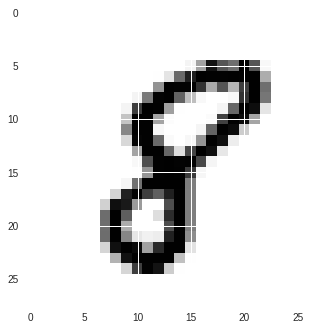

In [37]:
number = randint(0,len(x_test))
predictions = model.predict(X_test[number].reshape(1,28,28,1))
print("Modelprediction: " + str(predictions.argmax()))
plt.imshow(x_test[number])